In [184]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import math 
import sympy as sp

In [2]:
#1
sample = pd.read_csv('sample10_1_PM2022.csv', header = None, decimal = ',', sep = ';', encoding = 'cp1251')
sample = sample.values
n = sample.size
std = 2.7
M0 = 1.25
alpha = 0.05
z_stat = np.sqrt(len(sample)) * (sample.mean() - M0) / std

c_value = st.norm(0, 1).isf(alpha/2)
print(f'K = (-{np.inf}; {-c_value}), ({c_value}, +{np.inf}) ')
print(f'Zнабл = {z_stat}')
print('M0 не попадает в критическую область - гипотезу нельзя отклонить')


K = (-inf; -1.9599639845400545), (1.9599639845400545, +inf) 
Zнабл = -0.5622343260114797
M0 не попадает в критическую область - гипотезу нельзя отклонить


In [3]:
print(n)

1000


In [6]:
#2
z_stat = np.sqrt(len(sample))*(sample.mean()-M0) / std


In [7]:
pvalue = 2*(min(st.norm.cdf(z_stat), st.norm.sf(z_stat)));
pvalue

0.5739563770550328

In [8]:
print(f'Так как alpha < pvalue - гипотезу нельзя отвергнуть')

Так как alpha < pvalue - гипотезу нельзя отвергнуть


In [9]:
#3 
M1 = 1.2
B = st.norm.cdf(st.norm.isf(alpha/2) - (n**0.5)/std * (M0-M1)) + st.norm.cdf(st.norm.isf(alpha/2) + (n**0.5)/std * (M0-M1)) - 1;
print(f'Beta = {B}')

Beta = 0.9098796029261775


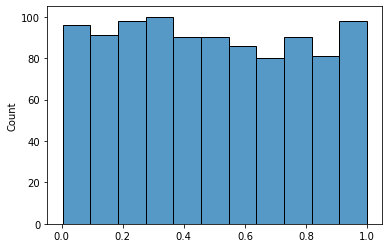

In [16]:
#4
def hist(mean, std, M0, alpha):
    data = st.norm(mean,std).rvs(100000)
    p_value = []
    for i in range(1000):
        sample = np.random.choice(data, 1000)
        sample_mean = sample.mean()
        z_stat = np.sqrt(len(sample))*(sample_mean-M0) / std
        pvalue = 2*min(st.norm().cdf(z_stat), st.norm().sf(z_stat))
        p_value.append(pvalue)
    sns.histplot(p_value)
hist(2,3,2,0.05)

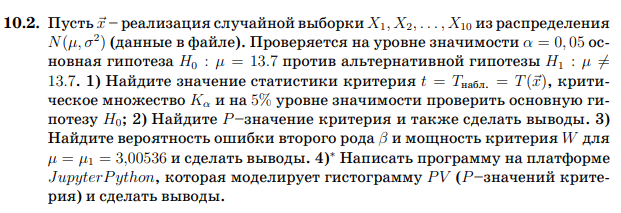

In [64]:
sample = pd.read_csv('sample10_2_PM2022.csv', header = None, decimal = ',', sep = ';', encoding = 'cp1251')
sample = sample.values
alpha = 0.05
sample_mean = sample.mean()
M0 = 13.7
n = sample.size

In [78]:
t_stat = np.sqrt(n) * (sample.mean() - M0) / sample.var(ddof = 1)**(1/2)
pp = st.t(n-1).isf(alpha/2)
pp
print(f'K = (-{np.inf}; {-pp}), ({pp}, +{np.inf}) ')
print(f'Tнабл = {t_stat}')
print('M0 не попадает в критическую область - гипотезу нельзя отклонить')

K = (-inf; -2.262157162740992), (2.262157162740992, +inf) 
Tнабл = 0.5831039501860182
M0 не попадает в критическую область - гипотезу нельзя отклонить


In [79]:
pvalue = 2*(min(st.t(n-1).cdf(t_stat), st.t(n-1).sf(t_stat)));
pvalue

0.5741416681136751

In [80]:
# 3
M1 = 3.00536
delta = np.sqrt(n) * (M1 - M0) / sample.var(ddof = 1)**(1/2)
B = st.nct(nc = sigma, df = n - 1).cdf(pp) - st.nct(nc = sigma, df = n - 1).cdf(-pp)
W = 1 - B
print(f'Beta = {B}, W = {W}\nВероятность ошибки второго рода низкая' )

Beta = 0.018951270387962182, W = 0.9810487296120378
Вероятность ошибки второго рода низкая


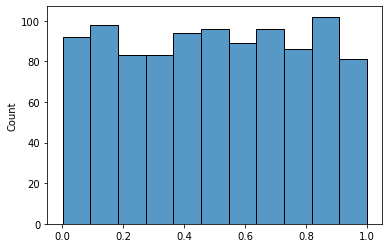

In [57]:
def hist(mean, std, M0, alpha):
    data = st.norm(mean,std).rvs(100000)
    p_value = []
    for i in range(1000):
        sample = np.random.choice(data, 100)
        n = sample.size
        sample_mean = sample.mean()
        std = sample.var(ddof = 1)**(1/2)
        t_stat = np.sqrt(n)*(sample_mean-M0) / std
        pvalue = 2*(min(st.t(n-1).cdf(t_stat), st.t(n-1).sf(t_stat)))
        p_value.append(pvalue)
    sns.histplot(p_value)
hist(2, 1, 2, 0.05)

#3
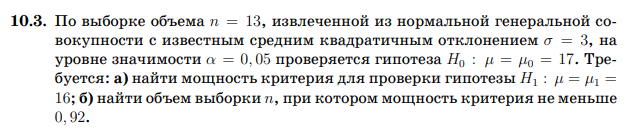

In [87]:
n = 13
std = 3
alpha = 0.05
M0 = 17
M1 = 16
B = st.norm.cdf(st.norm.isf(alpha) - (n**0.5)/std * (M0-M1))
W = 1 - B
print(f'Beta = {B}, W = {W}')

Beta = 0.6711182905937463, W = 0.3288817094062537


In [89]:
W1 = W
N = 13
while W1 < 0.92:
    N += 1
    B1 = st.norm.cdf(st.norm.isf(alpha) - (N**0.5)/std * (M0-M1))
    W1 = 1-B1
print(f'Необходим объем выборки более {N}')


Необходим объем выборки более 84


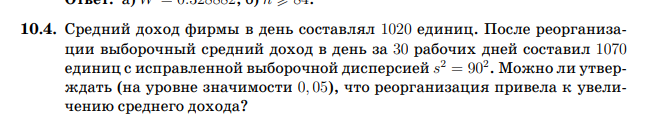

In [95]:
#4
# H0: Реорганизация не привела к увеличению дохода
# H1 : реогранизация привела к увеличению дохода
alpha = 0.05
M0 = 1020
mean = 1070
std = 90
n = 30
t_stat = (mean - M0) * np.sqrt(30) / std
print(t_stat)
pvalue = st.t(n-1).sf(t_stat)
print(f'pvalue = {pvalue}, pvalue < alpha => принимаем альтернативную гипотезу')

3.0429030972509232
pvalue = 0.0024697366791830372, pvalue < alpha => принимаем альтернативную гипотезу


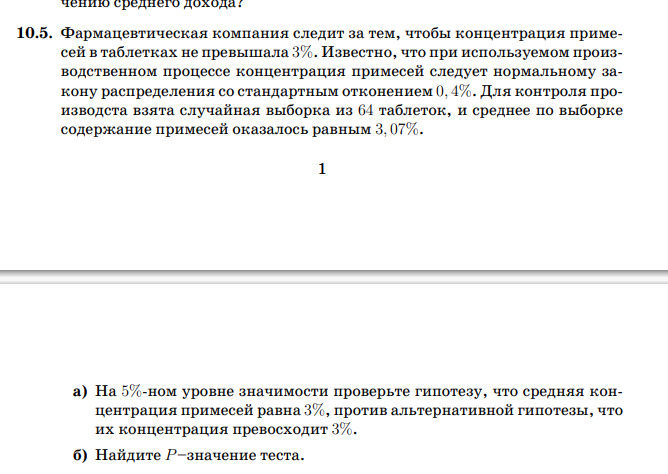

In [104]:
std = 0.4
mean = 3.07
n = 64
alpha = 0.05
M0 = 3
pp = st.norm.isf(alpha)
print(f'K = ({pp}, +{np.inf}) ')
z_stat = np.sqrt(n) * (mean - M0)/std
print(f'Zнабл = {z_stat}')
pvalue = st.norm.sf(z_stat)
print(f'pvalue = {pvalue}')

K = (1.6448536269514729, +inf) 
Zнабл = 1.3999999999999968
pvalue = 0.08075665923377151


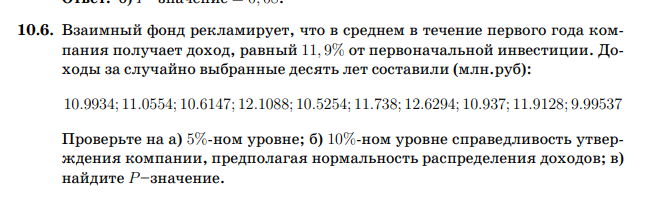

In [110]:
sample = list(map(lambda x: float(x),'10.9934; 11.0554; 10.6147; 12.1088; 10.5254; 11.738; 12.6294; 10.937; 11.9128; 9.99537'.split(';')))
sample = np.array(sample); sample

array([10.9934 , 11.0554 , 10.6147 , 12.1088 , 10.5254 , 11.738  ,
       12.6294 , 10.937  , 11.9128 ,  9.99537])

In [115]:
M0 = 11.9
mean = sample.mean()
n = len(sample)
s = sample.var(ddof = 1) ** (1/2)
t_stat = np.sqrt(n) * (mean - M0) / s; t_stat



-2.5088353084630746

In [119]:
#a) 
alpha = 0.05
pp = st.t(n-1).isf(alpha/2)
print(f'K = (-{np.inf}; {-pp}), ({pp}, +{np.inf}), Tнабл = {t_stat} ')
print(f'Наблюдаемое значение попадает в критическую область => отклоняем H0')

K = (-inf; -2.262157162740992), (2.262157162740992, +inf), Tнабл = -2.5088353084630746 
Наблюдаемое значение попадает в критическую область => отклоняем H0


In [121]:
#б)
alpha = 0.1
pp = st.t(n-1).isf(alpha/2)
print(f'K = (-{np.inf}; {-pp}), ({pp}, +{np.inf}), Tнабл = {t_stat} ')
print(f'Наблюдаемое значение попадает в критическую область => отклоняем H0')

K = (-inf; -1.8331129326536337), (1.8331129326536337, +inf), Tнабл = -2.5088353084630746 
Наблюдаемое значение попадает в критическую область => отклоняем H0


In [123]:
pvalue = 2 * min(st.t(n-1).sf(t_stat), st.t(n-1).cdf(t_stat))
print(f'pvalue = {pvalue}')

pvalue = 0.03337447452125529


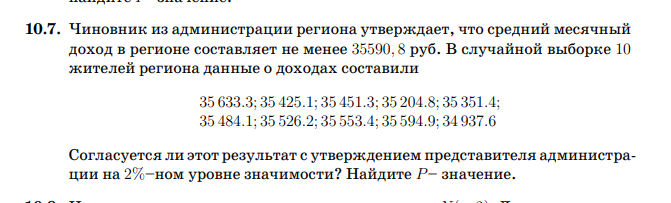

In [133]:
sample  = list(map(lambda x: float(x), '35 633.3; 35 425.1; 35 451.3; 35 204.8; 35 351.4; 35 484.1; 35 526.2; 35 553.4; 35 594.9; 34 937.6'.replace(' ','').split(';')))
sample = np.array(sample); sample

array([35633.3, 35425.1, 35451.3, 35204.8, 35351.4, 35484.1, 35526.2,
       35553.4, 35594.9, 34937.6])

In [145]:
mean = sample.mean()
alpha = 0.02
s = np.sqrt(sample.var(ddof = 1))
n = sample.size
M0 = 35590.8
t_stat = np.sqrt(n) * (mean - M0) / s
pp = -st.t(n-1).isf(alpha)
print(f'K = (-{np.inf}, {pp}), Tнабл = {t_stat} => H0 отклоняется')
mean

K = (-inf, -2.398440984714667), Tнабл = -2.639188999981983 => H0 отклоняется


35416.21

In [153]:
pvalue = st.t(n-1).cdf(t_stat); pvalue

0.013474792304269737

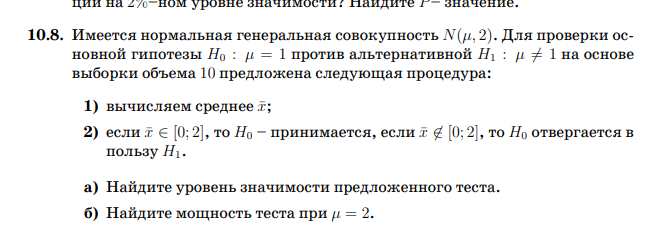

In [168]:
n = 10
X = st.norm(loc = 1, scale = (2/n)**(1/2))
#а) alpha - уровень значимости предложенного теста 
alpha = X.cdf(0) + X.sf(2); alpha
print(f'alpha = {alpha}')

alpha = 0.025347318677468252


In [167]:
#б)
X = st.norm(loc = 2, scale = (2/n)**(1/2)) 
B = X.cdf(2) - X.cdf(0)
print(f'W = {1 - B}')

W = 0.5000038721082155


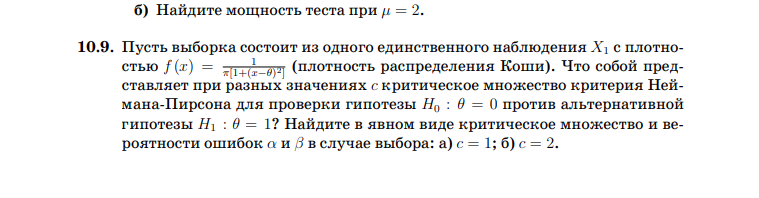

In [224]:
#а)
c1 = 1
c2 = 2
theta0 = 0
theta1 = 1

In [228]:
x, theta_0, theta_1, c = sp.symbols('x theta_0, theta_1 c')
stat = (1 + x**2)/(x**2 - 2*x + 2)
value = sp.solve(stat - c1)[0]
print(f'K = ({value}, +{np.inf})')
value = float(value)

K = (1/2, +inf)


In [229]:
alpha = st.cauchy(loc = 0, scale = 1).cdf(value)
print(f'alpha = {alpha}')
beta = st.cauchy(loc = 1, scale = 1).sf(value)
print(f'beta = {beta}')

alpha = 0.6475836176504333
beta = 0.6475836176504333


In [235]:
#б)
c = 2
value = sp.solve(stat - c2)
print(f'K = (-{np.inf}, {value[0]}), ({value[1]}, +{np.inf})')
alpha = st.cauchy(loc = 0, scale = 1).cdf(float(value[0])) + st.cauchy(loc = 0, scale = 1).sf(float(value[1]))
beta =  st.cauchy(loc = 1, scale = 1).sf(float(value[0])) - st.cauchy(loc = 1, scale = 1).sf(float(value[1]))
print(f'alpha = {alpha}, beta = {beta}')

K = (-inf, 1), (3, +inf)
alpha = 0.8524163823495667, beta = 0.35241638234956674
